## CNN Architectures

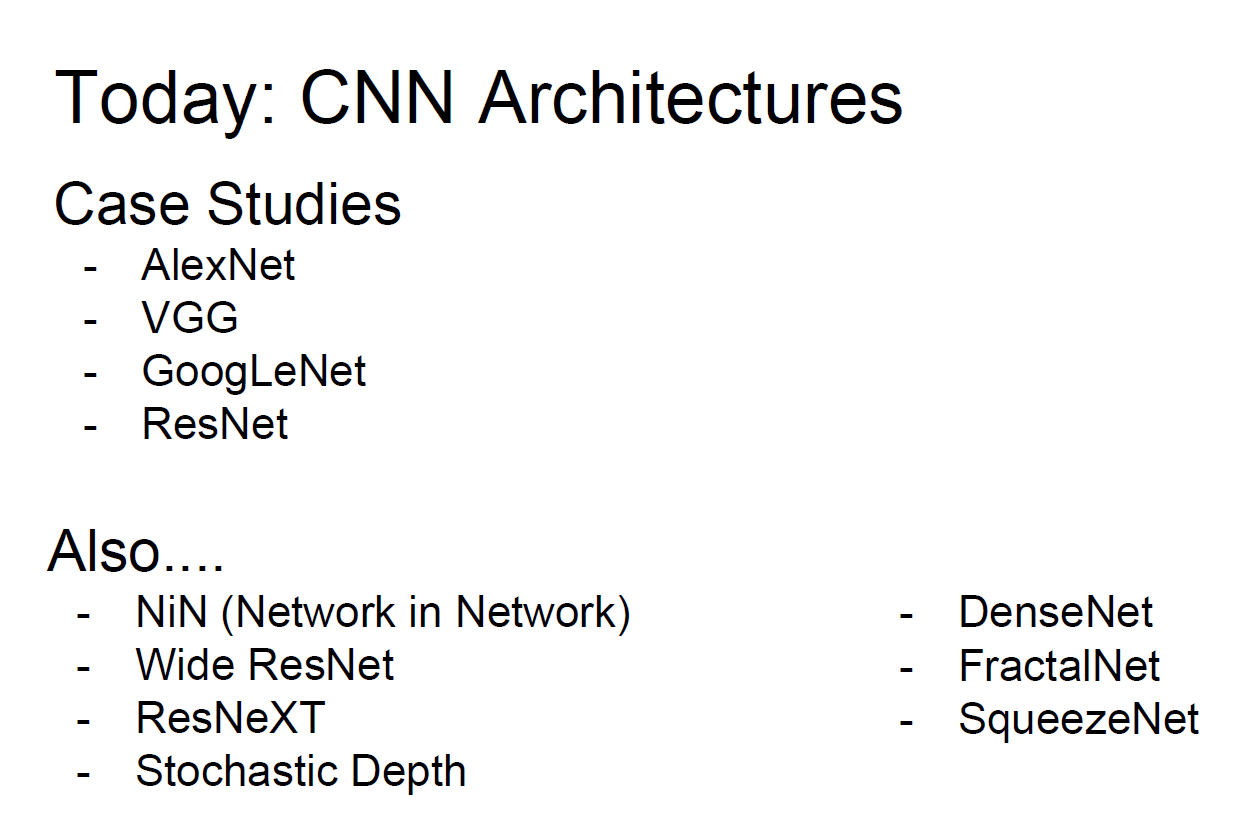

##### 9장에서는 imagenet에서 좋은 성적을 거둔 AlexNet, VGG, GoogLeNet, ResNet을 소개한다.
##### CNN 모델은 1998년 Convoulution Net 개념이 도입된 모델인 LeNet에서 시작되었다.
##### 이후 2012년, Alexnet 모델이 등장하면서 오차율이 줄어들었고, AlexNet 이후로 CNN 모델이 발전하게 되었다.

## AlexNet
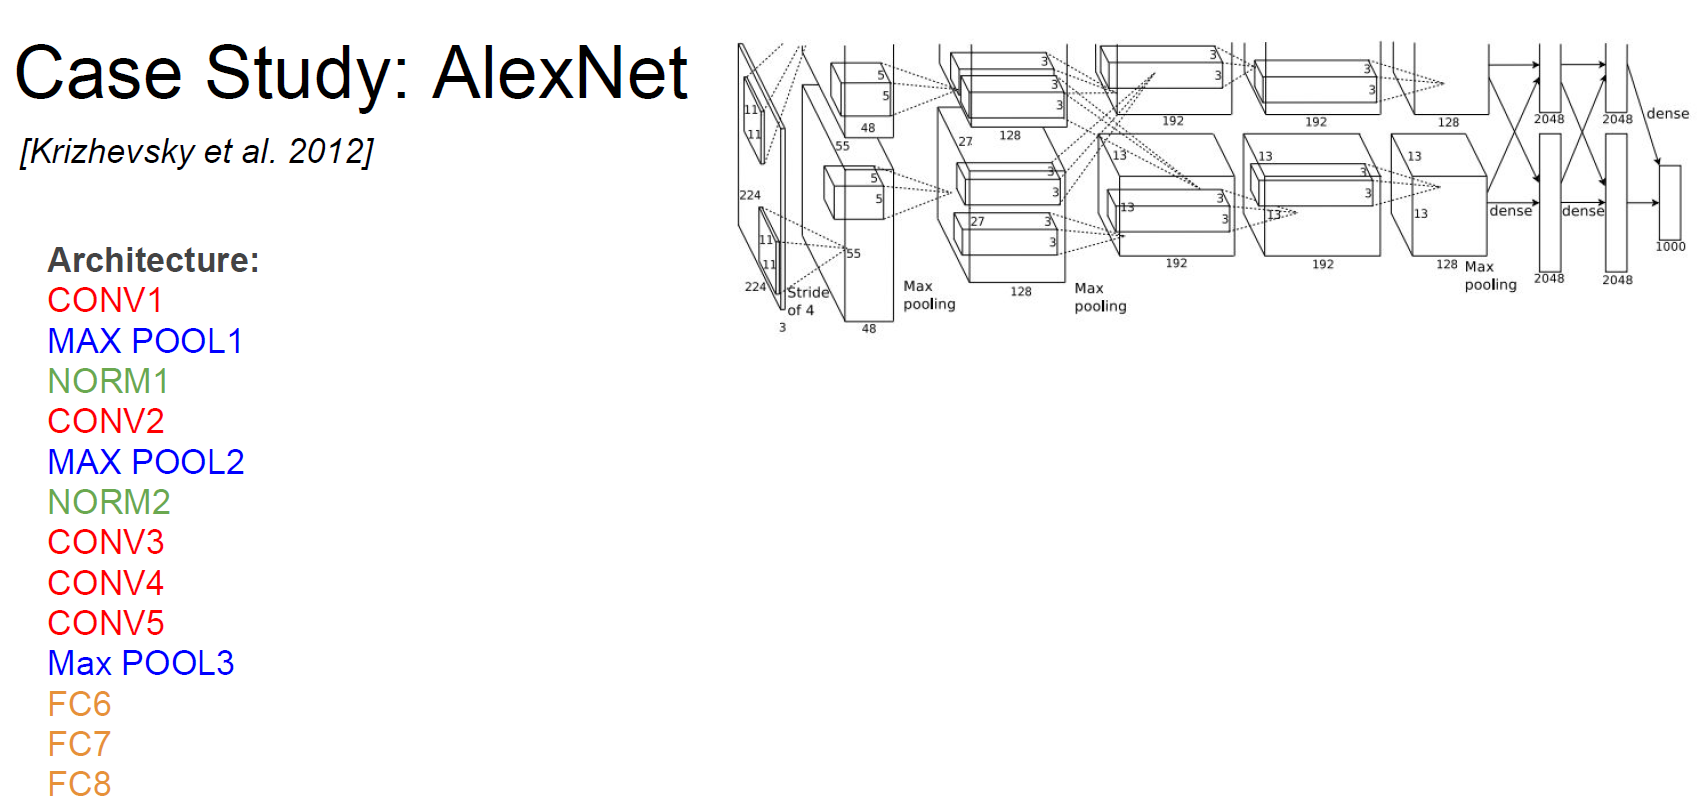

##### 2012년에 도입된 AlexNet는 최초의 Large scale CNN 모델이다.
##### 기본구조는 Convolution layer, Max Pooling Layer, Normaliztion이 2번 반복된 다음, 3번의 Convolution layer, 1번의 MaxPooling을 거친 후, 3번의 Fully Connected Layer가 나온다.
##### 당시 GPU 메모리가 32GB 한계로 모델을 두 파트로 나누어 계산했다.
##### 첫 번째에서는 convoution layer 15 에서는 feature map만 학습하게 되어 있고, 두 번째에는 convoulution 3, Fully Connected 6~8 GPU간 통신을 허용해 이전 layer의 모든 input으로 feature map을 참고하여 학습한다.
##### AlextNet의 특징은 LeNet보다 layer가 많다. 또한 AlexNet은 ReLU, 정규화로 Dropout, 최적화로 SGD momentum을, Ensemble 기법을 적용했다.

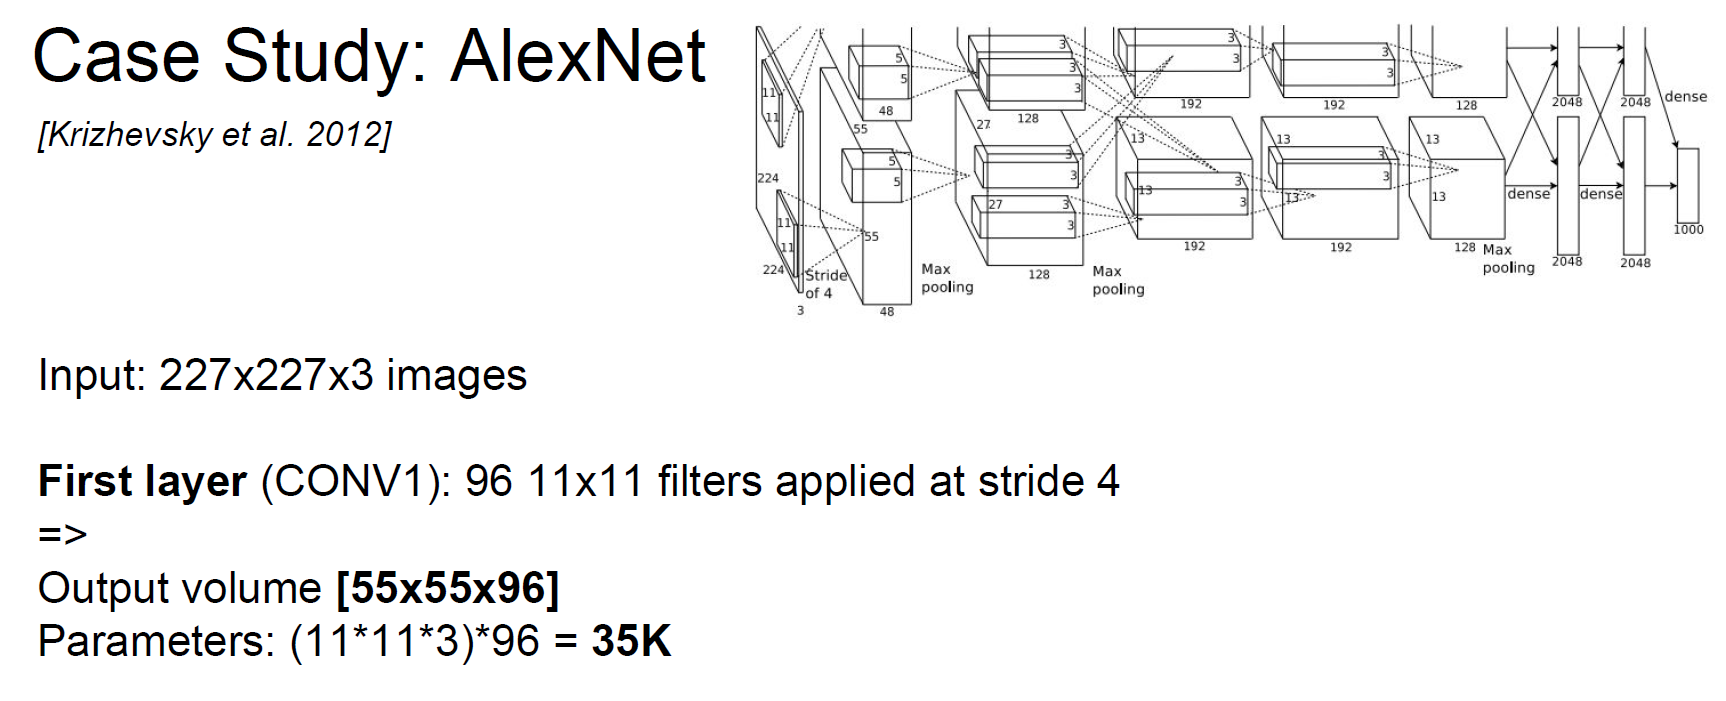

##### 아웃풋 볼륨 사이즈에 대한 강의 영상을 간단하게 정리하면 입력이미지가 227 * 227 * 3 이미지로 들어와 conv 필터와 연산을 거쳐(총 96개의 필터) 출력이미지가 55*55*96이 된다.
##### 이때 파라미터 개수는 11 * 11 * 3 * 96 으로 348348개다.

## VGGNet
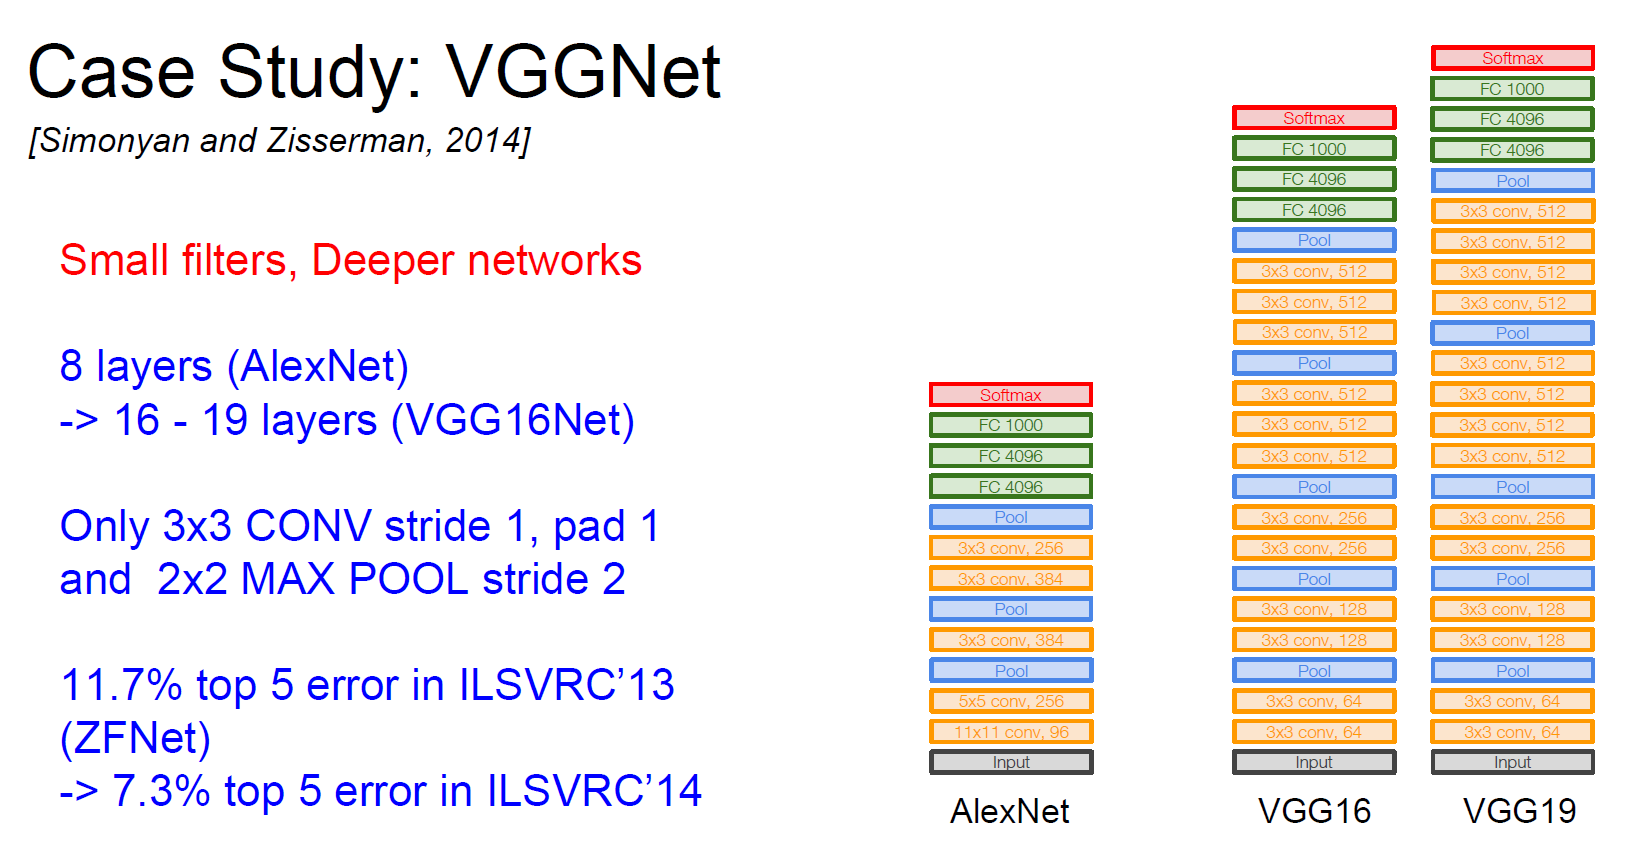

##### 2014년 Simonyan과 Zisserman이 만든 VGGNet은 이전모델보다 네트워크가 더 깊고 3*3의 작은 필터를 사용했다. layer가 깊어진 만큼 레이어 갯수가 많아지고, 작은 필터를 사용하면 Depth를 더 키울 수 있다.
##### 3 x 3 필터를 여러 개 쌓으면 7 x 7 필터를 사용하는 것과 실질적으로 동일한 Receptive Field를 가진다. Receptive Field은 filter가 한번에 볼 수 있는 입력의 Spatial area이다. (출력 레이어의 뉴런 하나에 영향을 미치는 입력 뉴런들의 공간 크기).
##### 2014년도 ImageNet Challenge에서 Google의 GoogleNet 다음으로 성능이 우수하고 강력한 네트워크를 가지고 있다.

##### VGGNet의 네트워크는 AlexNet과 비슷한 패턴으로 Conv Layer와 Pooling Layer가 반복적으로 진행되는 패턴이다. 즉. 다른 데이터에서도 특징(feature) 추출이 잘되며 다른 Task에서도 일반화 능력이 뛰어나다.

## GoogLeNet
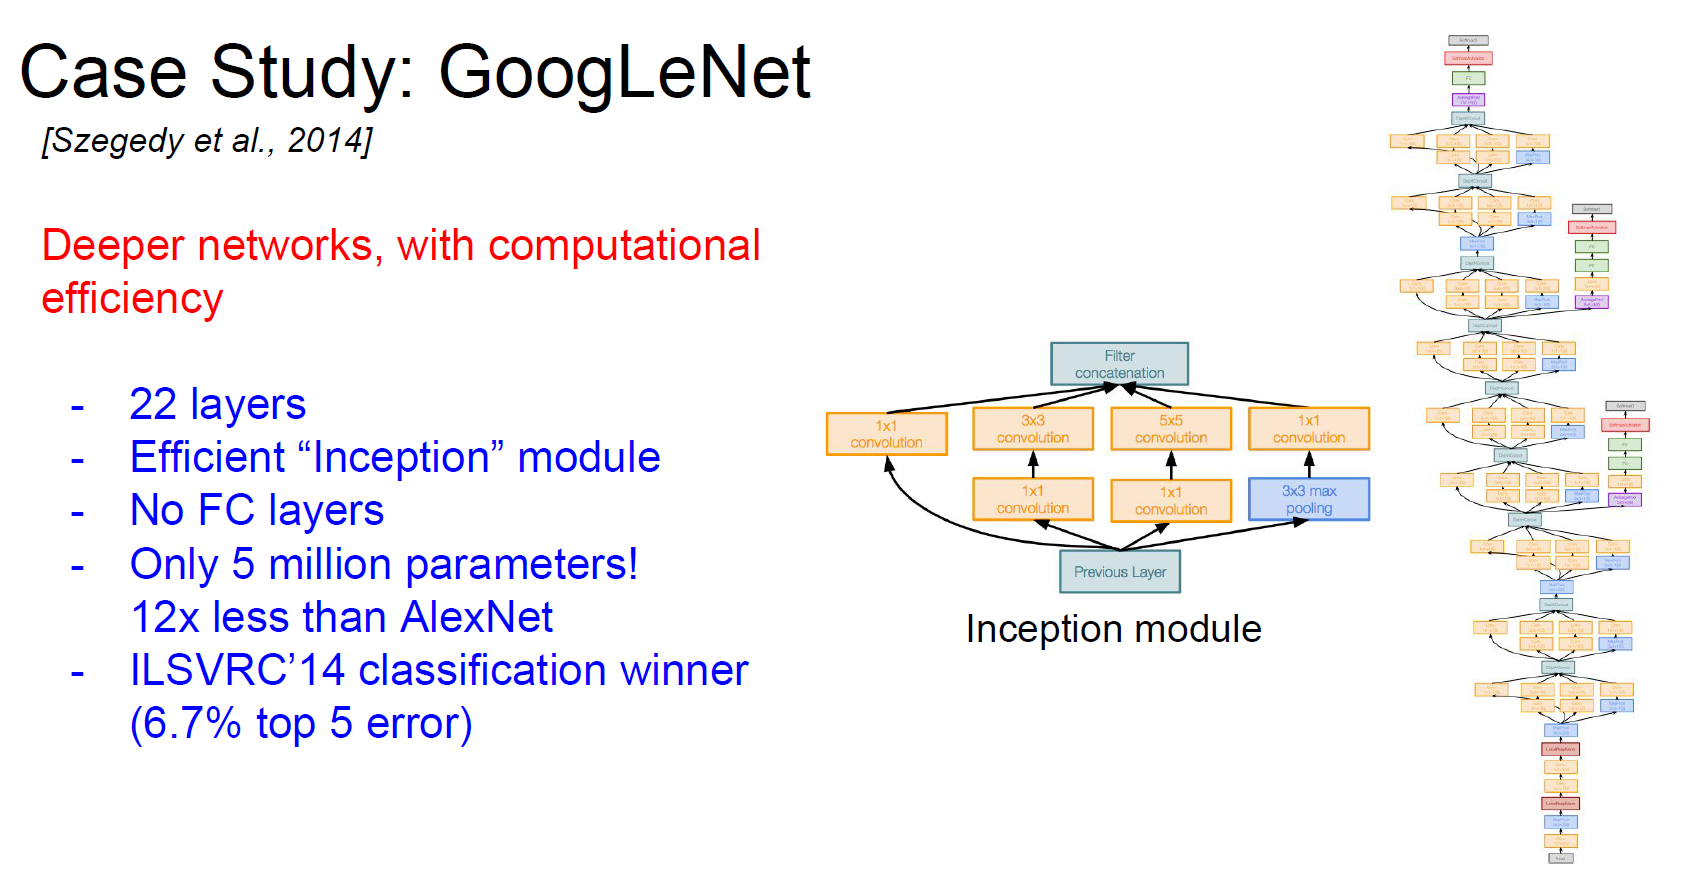

##### 2014년 Classification Challenge에서 우승한 GoogLeNet은 22개 층으로 네트워크는 더 깊어졌고 연산 효율은 증가했다.
##### GoogLeNet은 Inception module을 여러 개 쌓아서 만들었고, 파라미터를 줄이기 위해서 FC-Layer를 없앴다.

##### inception module 내부에는 다양한 필터들이 병렬로 존재한다. conv 연산을 나중에 depth 방향으로 concatenate 하는 것이다.

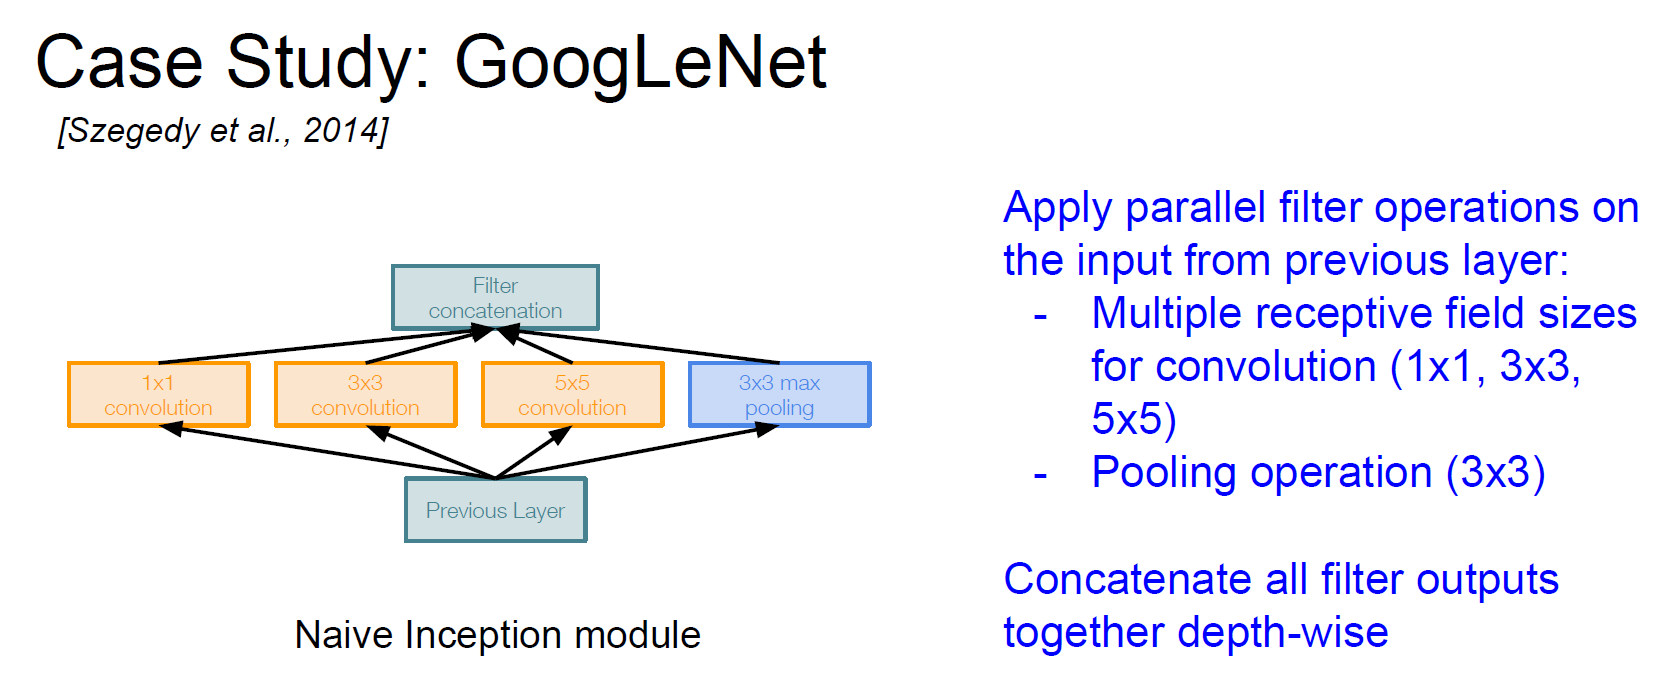

##### 그런데 레이어를 거칠때마다 Depth가 늘어나고, Pooling의 출력은 이미 입력의 Depth와 동일한 문제가 발생한다. 즉 계산량이 커지는 문제를 해결하기 위해  bottleneck block"(1*1conv)을 사용했다.
##### Conv 연산을 수행하기에 앞서 입력을 더 낮은 차원으로 보내 계산 복잡도를 줄인다.

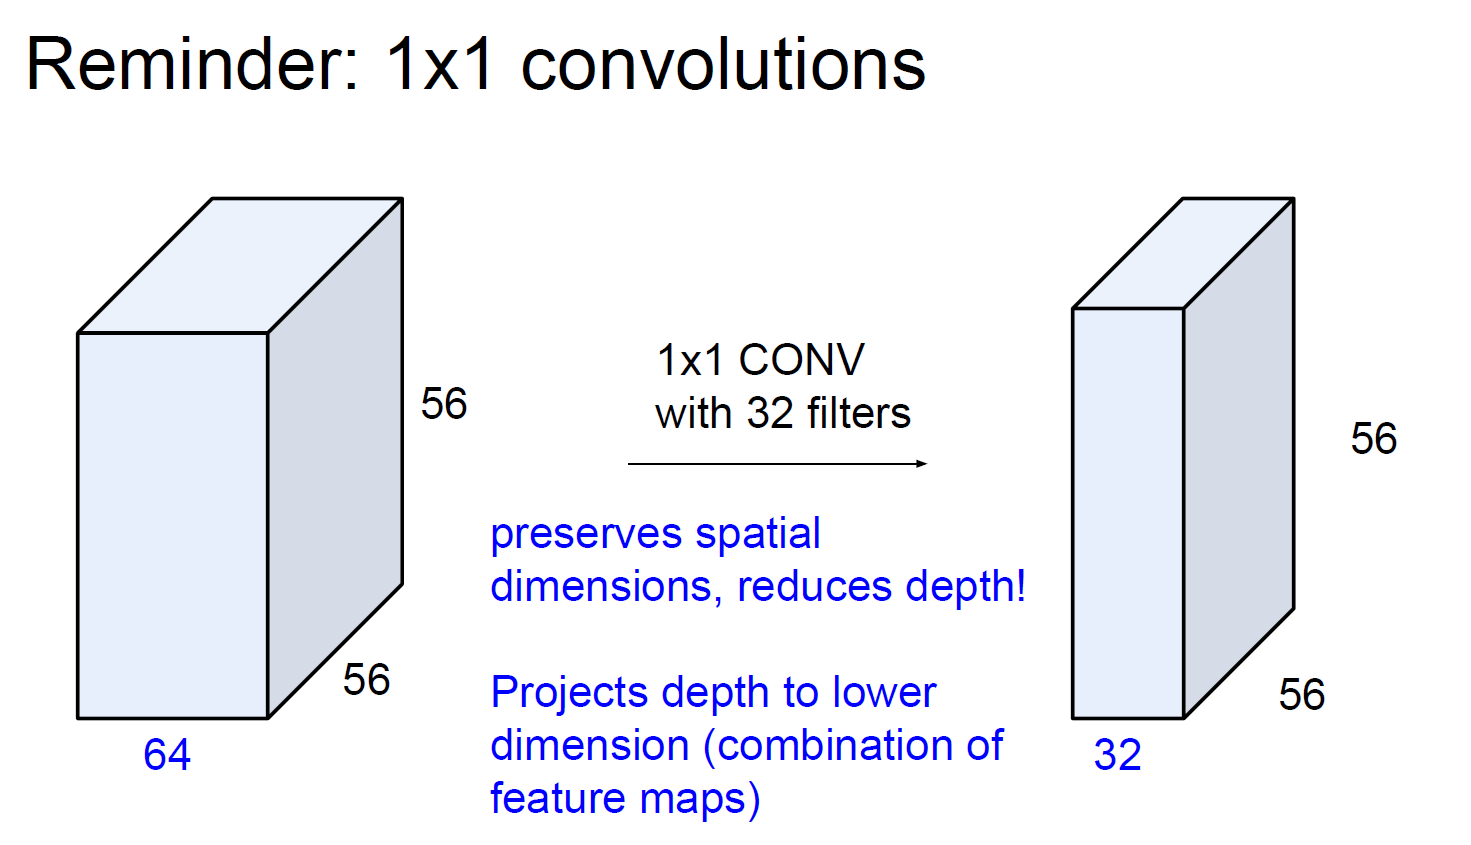

##### layer가 깊어 gradient vanishing 문제가 발생할 수 있기에 중간에 보조 분류기(auxiliary classfication)을 둔다.
##### 보조분류기는 일종의 mini network로 대표적으로 Average pooling가 있다.

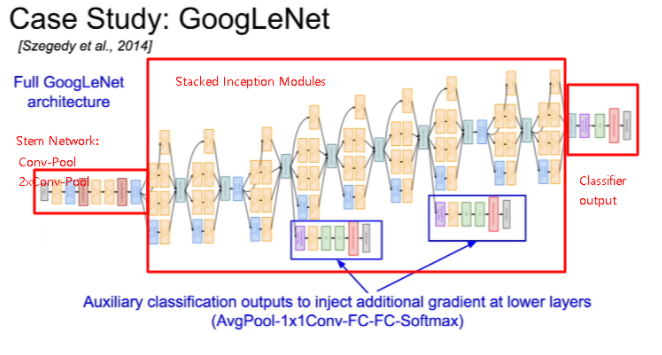

## ResNet

##### 2015년에 이미지 대회를 휩쓸었던 ResNet(Residual Network)은 깊은 네트워크(152개 layer)를 가지고 있고, residual connection(skip connection, short cur) 을 사용한다.
##### 모델이 깊어질수록 최적화가 어려워 성능이 저하되는 문제가 발생한다. 그래서 얕은 네트워크를 가져와 input을 output으로 내보내는 identiy mapping을 이용했다.

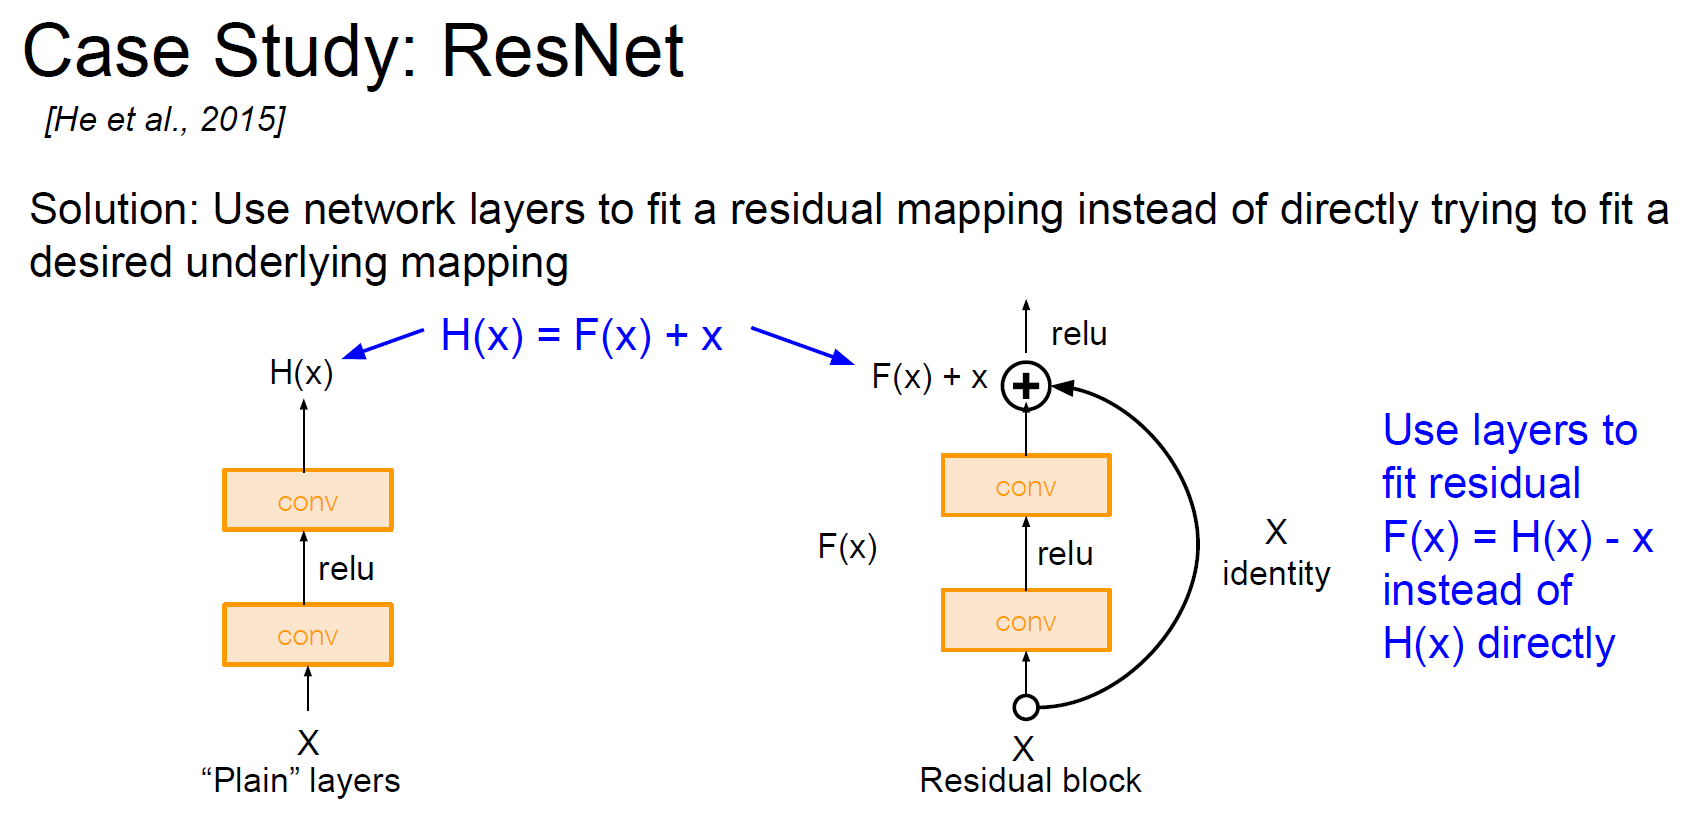

##### 오른쪽 그림과 같이 residual block 안에 identity mapping 을 사용해 출력단으로 보내고 실제 layer는 그 안에서  추가된 F(x)  변화량만 학습한다.
##### 따라서 최종 출력값은 input X + 변화량(F(x)) 가 된다.

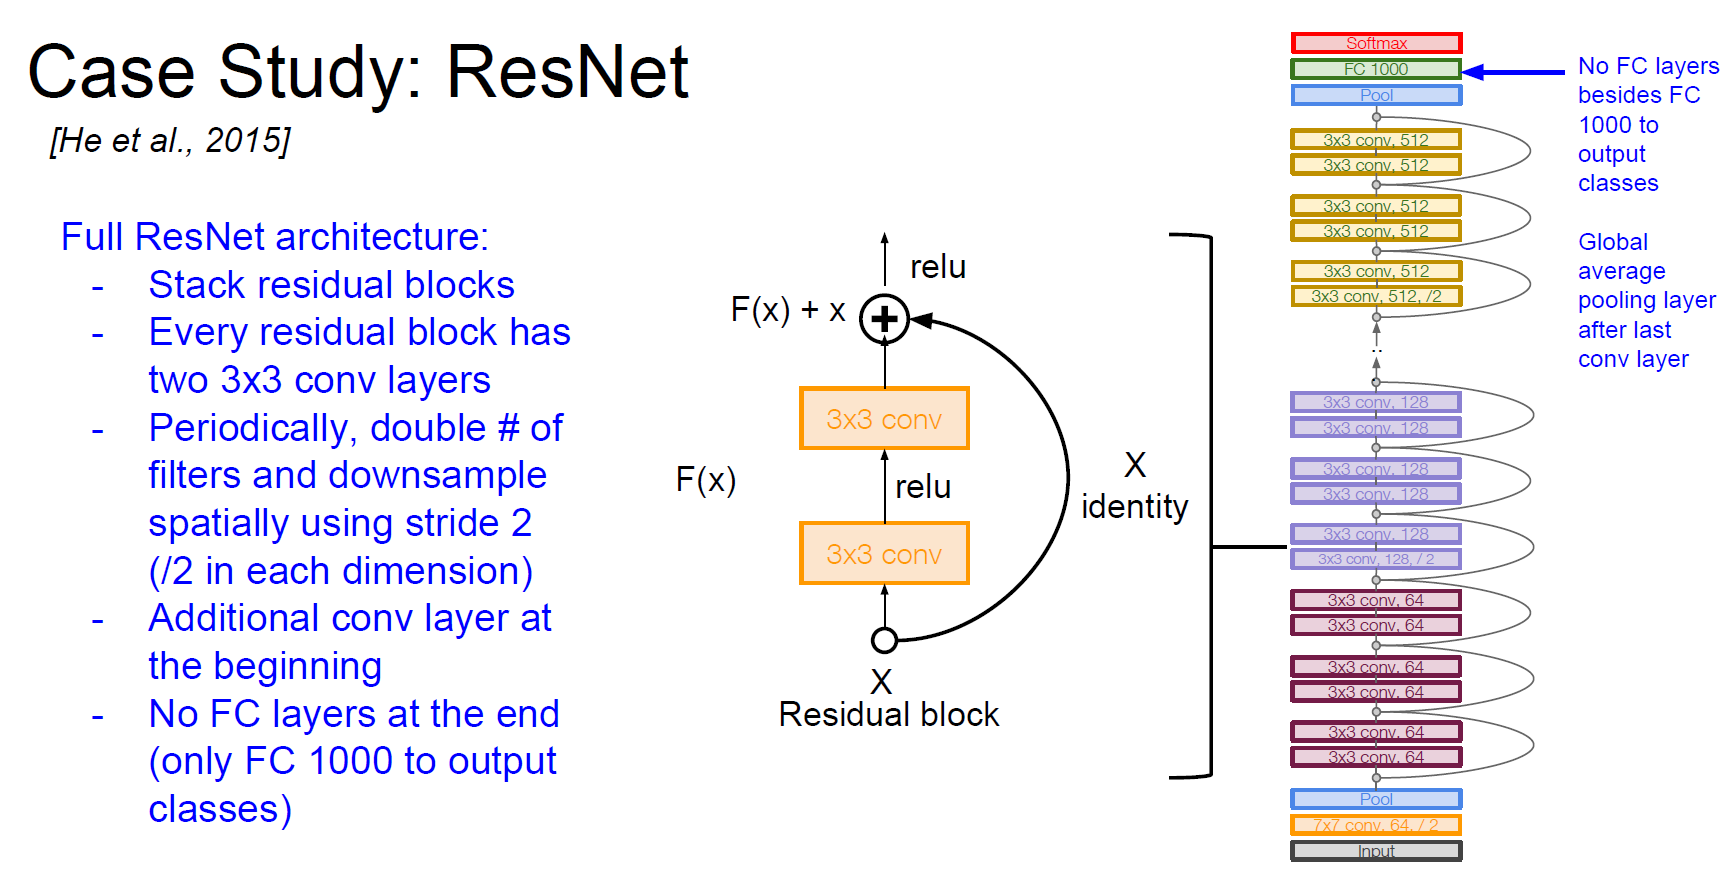

##### 따라서 ResNet에서는 residual block으로 구성된 추가 layer를 깊게 쌓았다.
##### 기본구조는 VGG Net에서 가져왔으나, 모든 residual block은 3x3 conv 2층을 가진다. 주기적으로 필터수를 2배씩 늘려주고, feature map 의 spatial dimension을 줄일 땐 pooling이 아닌 stride=2를 적용했다.
##### 필터수를 늘린 이유는 feature map의 spatial dimension을 줄이면서 depth를 대신 늘려 layer 간 연산의 time complexity를 비슷하게 유지하려고 했다고 한다.
##### parameter 수를 줄여 연산량을 낮추기 위해 마지막 FC layer를 없애고,  Global Average Pooling을 사용해 FC layer 하나만 갖게 한다.

##### ResNet의 추가적인 특징을 살펴보면 다음과 같다.


1. Conv layer 다음 Batch Normalization(BN)을 사용한다.
2. 초기화는 Xavier를 사용하는데 2로 나눈 것을 쓴다. 이렇게 하면 SGD+Momemtum에서 좋은 성능을 가진다.
3. learning rate 는 0.1로 설하고 loss가 줄어들지 않도록 조금씩 줄여준다.
4. dropout은 사용하지 않는다.
5. weight decay는 1e-5 이다.


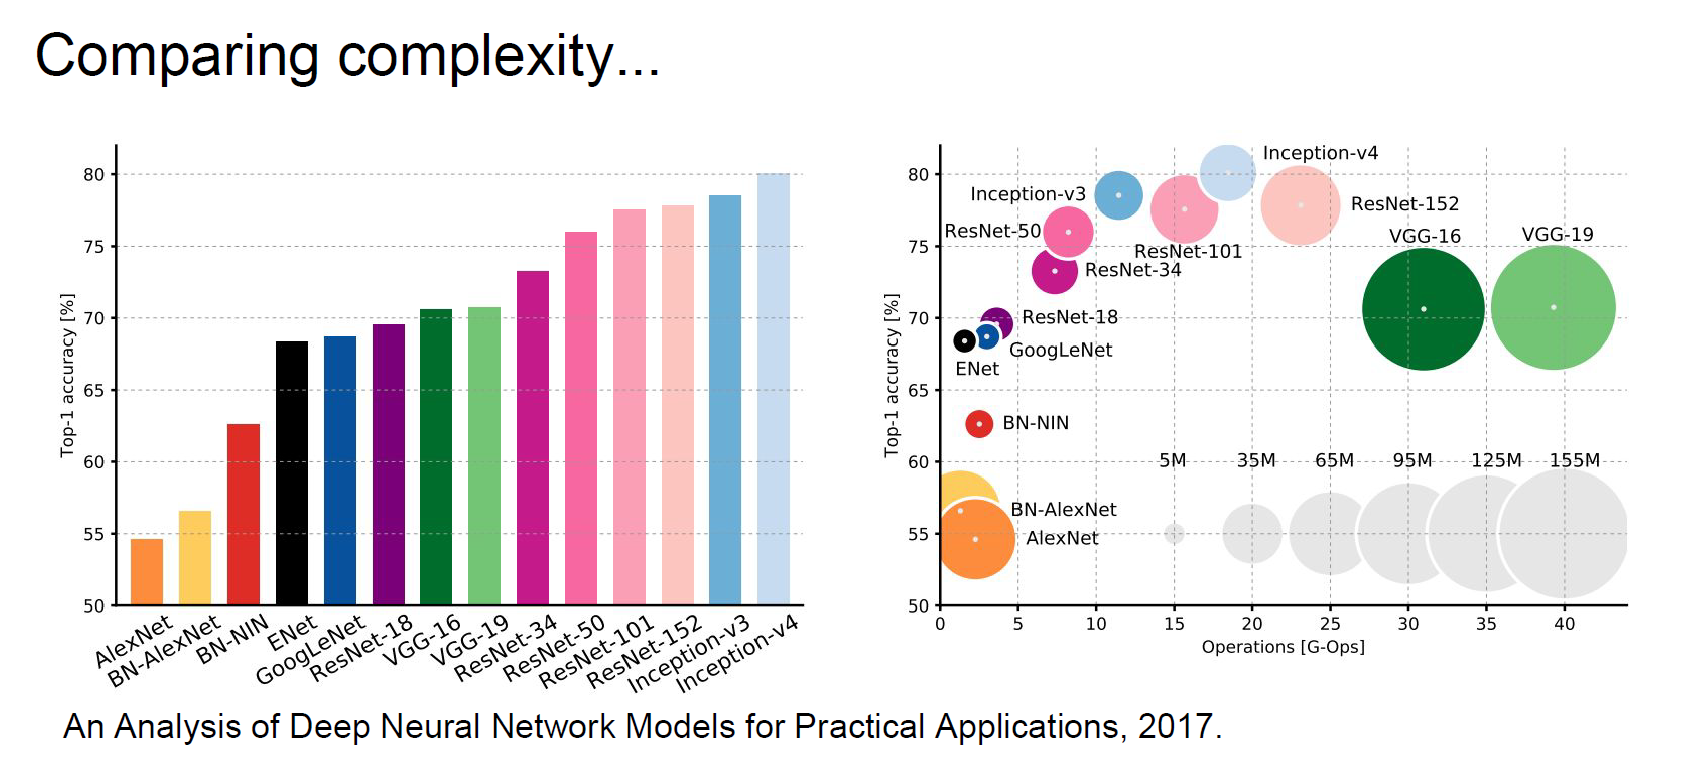

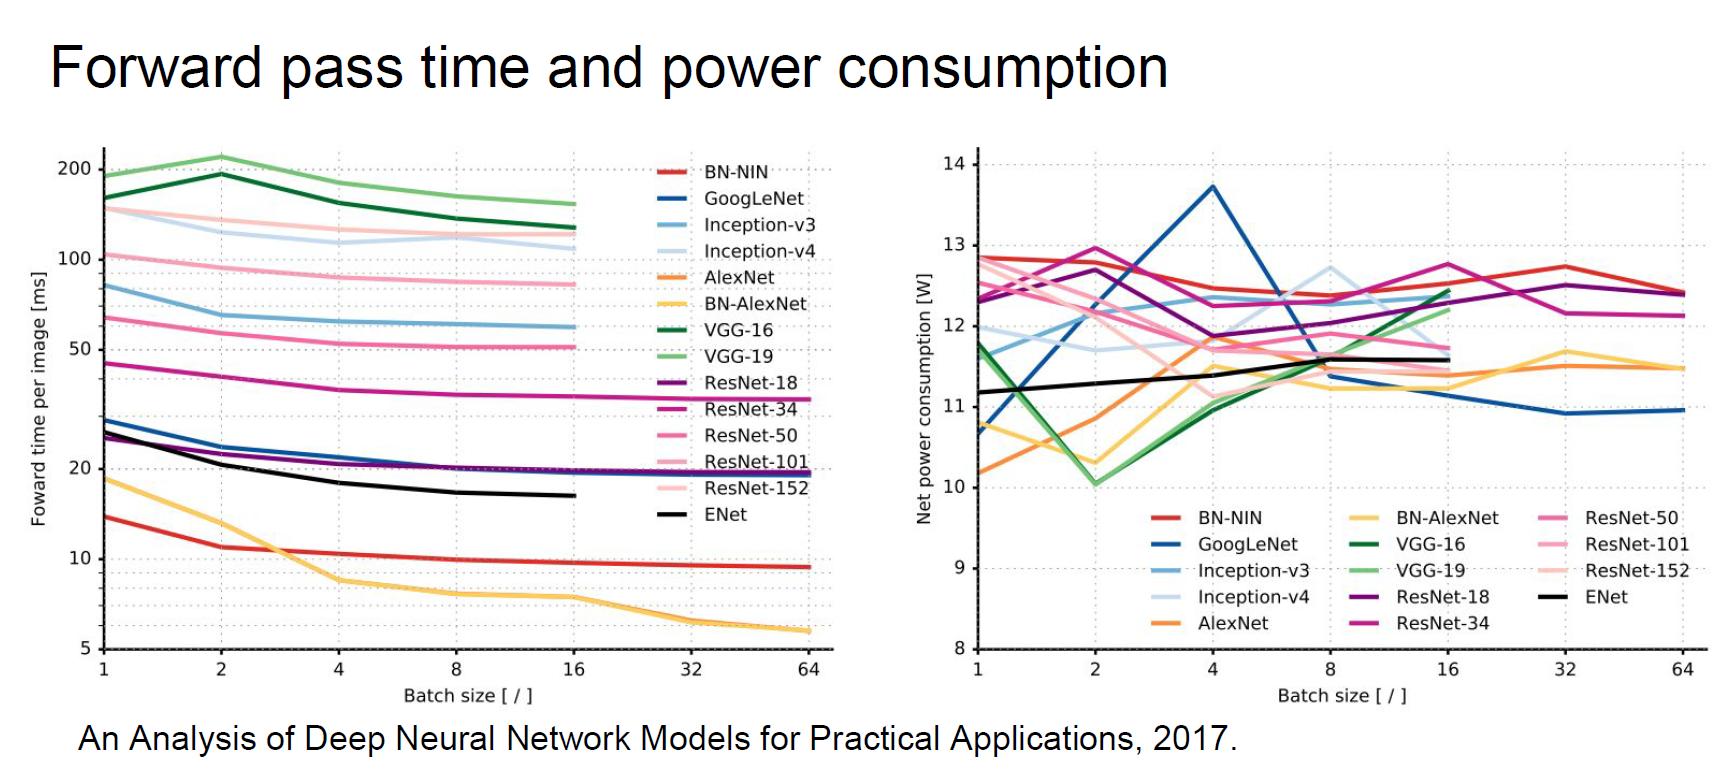

##### 2017년 기준으로 모델 성능을 비교 했을때  GoogleNet과 ResNet을 결합한 모델이 가장 좋은 것을  확인할 수 있다.(원의 크기, 메모리 크기 , x축: 연산량, y축: 성능(정확도))



1. VGG : 기장 많은 메모리를 요구하고 연산량도 많다.
2. GoogleNet : VGG와 비교해서 성능은 비슷하지 메모리와 연산량을 줄였다.
3. AlexNet : 연산량은 적고 성능도 낮다. 메모리 또한 많이 요구된다.
4. ResNet : 메모리나 연산이 중간이고 성능이 제일 좋다.






